In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest

# Exploratory Data Analys
dataset source :
https://www.kaggle.com/datasets/iabhishekofficial/creditcard-fraud-detection/data

In [2]:
# https://www.kaggle.com/datasets/iabhishekofficial/creditcard-fraud-detection/data

df_transactions = pd.read_csv('/Users/Fikry/datasets/transactions.csv')
df_cc = pd.read_csv('/Users/Fikry/datasets/cc_info.csv')

In [3]:
df_transactions

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719
...,...,...,...,...,...
294583,9999757432802760,2015-09-10 19:43:33,127.23,-82.360952,32.978497
294584,9999757432802760,2015-08-06 21:00:13,84.90,-82.322721,33.061071
294585,9999757432802760,2015-09-22 16:15:47,77.54,-82.442130,32.949983
294586,9999757432802760,2015-08-27 18:08:24,144.05,-82.398587,32.976162


In [4]:
df_cc

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000
...,...,...,...,...,...
979,8938296722055540,Houston,PA,15342,36000
980,2756688131944353,Washington,NH,3280,15000
981,5783648852115715,Washington,NH,3280,20000
982,8259854075192493,Omaha,GA,31821,10000


In [5]:
df_fraud = pd.merge(df_transactions, df_cc, on='credit_card', how='inner')
df_fraud['date'] = pd.to_datetime(df_fraud['date'])
df_fraud.sort_values(by=['credit_card', 'date'], inplace=True)
df_fraud

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
38,1003715054175576,2015-07-31 20:03:05,45.52,-80.186336,40.168399,Houston,PA,15342,20000
194,1003715054175576,2015-07-31 20:25:28,96.10,-80.156132,40.222907,Houston,PA,15342,20000
107,1003715054175576,2015-07-31 23:09:32,20.94,-80.262219,40.242532,Houston,PA,15342,20000
124,1003715054175576,2015-08-01 10:48:03,51.27,-80.176899,40.313324,Houston,PA,15342,20000
137,1003715054175576,2015-08-01 17:43:43,127.99,-80.226671,40.295995,Houston,PA,15342,20000
...,...,...,...,...,...,...,...,...,...
294582,9999757432802760,2015-10-23 20:47:23,216.30,-82.443294,32.991054,Louisville,GA,30434,6000
294503,9999757432802760,2015-10-24 01:12:54,233.97,-82.410848,32.934690,Louisville,GA,30434,6000
294508,9999757432802760,2015-10-25 21:53:33,177.51,-82.452819,32.997676,Louisville,GA,30434,6000
294519,9999757432802760,2015-10-27 21:38:09,146.37,-82.326567,32.952887,Louisville,GA,30434,6000


In [6]:
df_fraud.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
city                         0
state                        0
zipcode                      0
credit_card_limit            0
dtype: int64

In [7]:
df_fraud.duplicated().sum()

0

In [8]:
np.nanmin(df_fraud["transaction_dollar_amount"])

0.01

In [9]:
np.nanmax(df_fraud["transaction_dollar_amount"])

999.97

In [10]:
df_fraud['transaction_dollar_amount'].mean()

86.00803617255283

In [11]:
df_fraud['credit_card'].nunique()

984

In [12]:
df_fraud['credit_card'].value_counts()

2239759218122779    667
3015736744626726    657
5059189477453448    655
4569281393242605    653
3824313030996787    653
                   ... 
4705966876787269      2
6400102930973570      2
2848482178783636      1
4954103748307036      1
4296246438604183      1
Name: credit_card, Length: 984, dtype: int64

In [13]:
df_fraud['city'].nunique()

124

In [14]:
df_fraud['city'].value_counts()

Washington    112693
Houston        21389
New York       15599
El Paso        12580
Dallas         10713
               ...  
Detroit           38
Vallejo           36
Baltimore         24
Roanoke           12
Bristol            5
Name: city, Length: 124, dtype: int64

In [15]:
df_fraud['state'].nunique()

35

In [16]:
df_fraud['state'].value_counts()

NH    118247
PA     44365
NY     28672
IL     15788
MA     14856
WV      7887
VT      7546
NJ      6391
CA      4954
ME      4660
TX      3883
GA      3617
OH      3468
IN      3278
PR      2926
MO      2925
OK      2284
NM      2176
IA      1933
FL      1612
WA      1612
AL      1389
CT      1272
RI      1253
VA       896
ID       858
HI       839
LA       833
MI       812
NC       808
MD       796
AZ       619
UT       548
CO       532
KS        53
Name: state, dtype: int64

In [17]:
df_fraud['zipcode'].nunique()

124

In [18]:
df_fraud['zipcode'].value_counts()

3280     112693
15342     21389
10001     15599
61738     12580
18612     10713
          ...  
4929         38
94589        36
21201        24
24001        12
2809          5
Name: zipcode, Length: 124, dtype: int64

In [19]:
df_fraud['credit_card_limit'].nunique()

28

In [20]:
df_fraud['credit_card_limit'].value_counts()

20000    44301
10000    42101
12000    24796
16000    19369
15000    19025
18000    16540
8000     15253
14000    13979
9000     13262
30000    11057
6000      8217
4000      8118
5000      7899
24000     7329
7000      7206
21000     6494
25000     5623
28000     5255
35000     4120
40000     2892
27000     2881
2000      2076
3000      2026
36000     1693
32000     1178
42000      655
33000      626
55000      617
Name: credit_card_limit, dtype: int64

In [21]:
df_fraud['year'] = df_fraud['date'].dt.year
df_fraud['month'] = df_fraud['date'].dt.month
df_fraud['day'] = df_fraud['date'].dt.day
df_fraud['hour'] = df_fraud['date'].dt.hour
df_fraud.drop(['date','city', 'state', 'zipcode'], axis=1, inplace=True)
df_fraud

,credit_card,transaction_dollar_amount,Long,Lat,credit_card_limit,year,month,day,hour
38,1003715054175576,45.52,-80.186336,40.168399,20000,2015,7,31,20
194,1003715054175576,96.10,-80.156132,40.222907,20000,2015,7,31,20
107,1003715054175576,20.94,-80.262219,40.242532,20000,2015,7,31,23
124,1003715054175576,51.27,-80.176899,40.313324,20000,2015,8,1,10
137,1003715054175576,127.99,-80.226671,40.295995,20000,2015,8,1,17
...,...,...,...,...,...,...,...,...,...
294582,9999757432802760,216.30,-82.443294,32.991054,6000,2015,10,23,20
294503,9999757432802760,233.97,-82.410848,32.934690,6000,2015,10,24,1
294508,9999757432802760,177.51,-82.452819,32.997676,6000,2015,10,25,21
294519,9999757432802760,146.37,-82.326567,32.952887,6000,2015,10,27,21


# Visualize

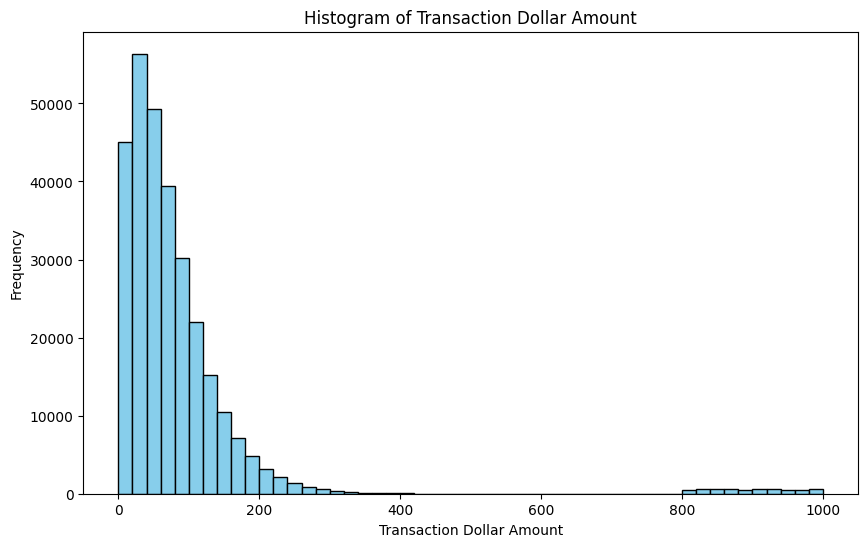

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(df_fraud['transaction_dollar_amount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Transaction Dollar Amount')
plt.xlabel('Transaction Dollar Amount')
plt.ylabel('Frequency')
plt.show()

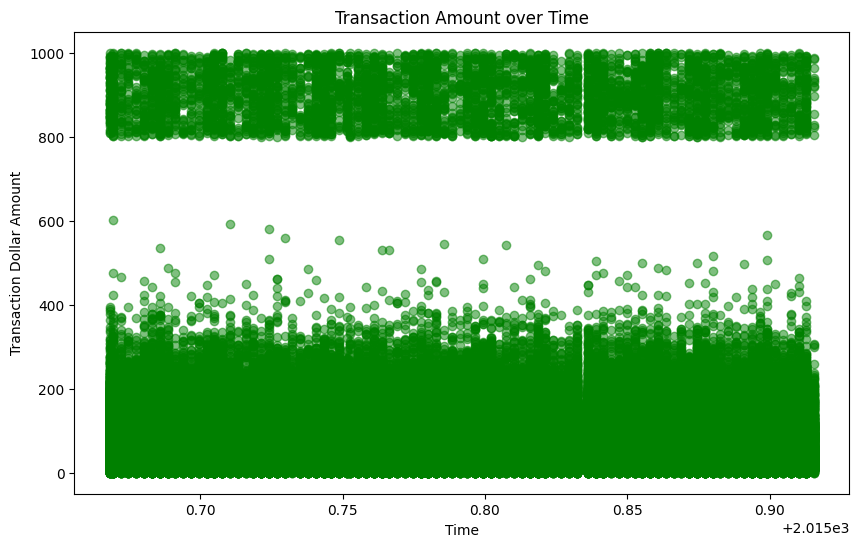

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df_fraud['year'] + df_fraud['month']/12 + df_fraud['day']/365, df_fraud['transaction_dollar_amount'], alpha=0.5, color='green')
plt.title('Transaction Amount over Time')
plt.xlabel('Time')
plt.ylabel('Transaction Dollar Amount')
plt.show()

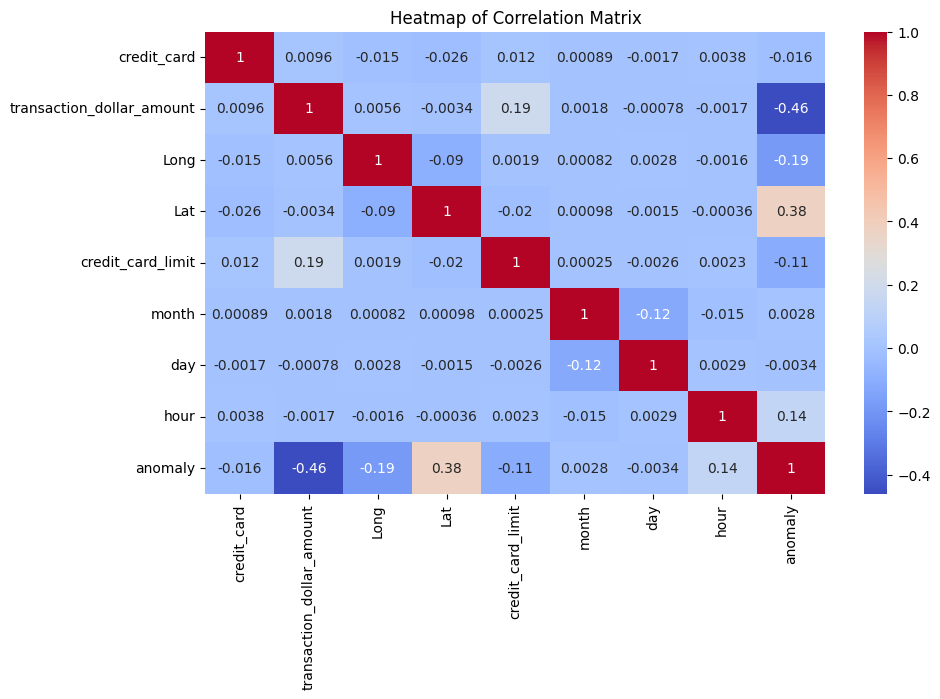

In [49]:
plt.figure(figsize=(10, 6))
corr = df_fraud.drop(columns=['year'])
corr_matrix = corr.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

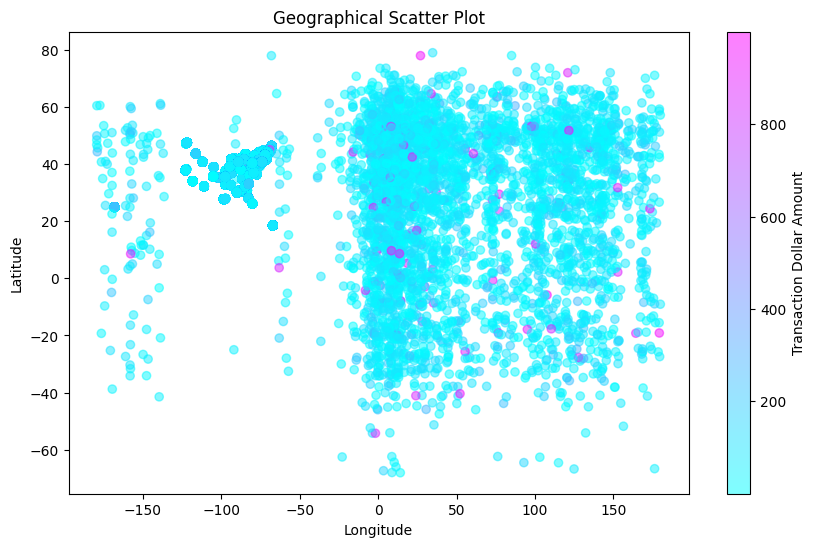

In [50]:
plt.figure(figsize=(10, 6))
plt.scatter(df_fraud['Long'], df_fraud['Lat'], c=df_fraud['transaction_dollar_amount'], cmap='cool', alpha=0.5)
plt.colorbar(label='Transaction Dollar Amount')
plt.title('Geographical Scatter Plot')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Preprocessing Data

In [22]:
df_features = df_fraud.drop(columns=['credit_card'])

In [23]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

# Isolation Forest

In [24]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_scaled)
anomaly_scores = iso_forest.predict(df_scaled)

In [25]:
df_fraud['anomaly'] = anomaly_scores

In [26]:
df_fraud

,credit_card,transaction_dollar_amount,Long,Lat,credit_card_limit,year,month,day,hour,anomaly
38,1003715054175576,45.52,-80.186336,40.168399,20000,2015,7,31,20,1
194,1003715054175576,96.10,-80.156132,40.222907,20000,2015,7,31,20,1
107,1003715054175576,20.94,-80.262219,40.242532,20000,2015,7,31,23,1
124,1003715054175576,51.27,-80.176899,40.313324,20000,2015,8,1,10,1
137,1003715054175576,127.99,-80.226671,40.295995,20000,2015,8,1,17,1
...,...,...,...,...,...,...,...,...,...,...
294582,9999757432802760,216.30,-82.443294,32.991054,6000,2015,10,23,20,1
294503,9999757432802760,233.97,-82.410848,32.934690,6000,2015,10,24,1,-1
294508,9999757432802760,177.51,-82.452819,32.997676,6000,2015,10,25,21,1
294519,9999757432802760,146.37,-82.326567,32.952887,6000,2015,10,27,21,1


# Results

In [27]:
anomalies = df_fraud[df_fraud['anomaly'] == -1]

anomalies

,credit_card,transaction_dollar_amount,Long,Lat,credit_card_limit,year,month,day,hour,anomaly
226,1003715054175576,859.31,-80.202474,40.221667,20000,2015,8,24,15,-1
255,1003715054175576,905.54,-80.237126,40.290891,20000,2015,9,2,20,-1
113,1003715054175576,99.27,34.429275,24.659874,20000,2015,9,8,16,-1
84,1003715054175576,995.35,-80.126760,40.225626,20000,2015,9,11,19,-1
14,1003715054175576,146.75,69.475216,25.125749,20000,2015,9,18,21,-1
...,...,...,...,...,...,...,...,...,...,...
294495,9999757432802760,155.40,-82.373712,33.007130,6000,2015,10,4,1,-1
294538,9999757432802760,126.58,-82.348015,32.950852,6000,2015,10,15,0,-1
294489,9999757432802760,896.09,-82.363676,33.057257,6000,2015,10,15,21,-1
294468,9999757432802760,144.89,-82.404946,33.074325,6000,2015,10,20,0,-1


In [28]:
anomalies['credit_card'].unique()

array([1003715054175576, 1013870087888817, 1023820165155391,
       1087468642191606, 1089479586475600, 1101164752077181,
       1106824181265726, 1107936587129946, 1126571863414211,
       1128536627506856, 1134742235676586, 1137926374621536,
       1144894232607400, 1155726765596507, 1156998467006869,
       1165413984579076, 1167475218806361, 1169271395749970,
       1175962294549313, 1190980117697422, 1191702776174515,
       1210872963953886, 1221421251374063, 1222730774437945,
       1224132812823172, 1228288249952859, 1246716439259317,
       1254472912142815, 1261411767321605, 1264384810841217,
       1280981422329509, 1284450389976622, 1295205764436116,
       1301519430111888, 1312823087473107, 1326817464191542,
       1337293370722685, 1363526625562684, 1368742094369263,
       1375199270298437, 1380553699881195, 1388343943378591,
       1402909379316770, 1409322756311484, 1420382222148431,
       1428403246999020, 1460880989446247, 1461675388467265,
       1464551767416747,

In [29]:
anomalous_credit_cards = anomalies['credit_card'].unique()
total_anomalous_credit_cards = len(anomalous_credit_cards)

print(f"Total credit card numbers with anomaly : {total_anomalous_credit_cards}")

Total credit card numbers with anomaly : 922


# Plot

In [30]:
anomalies = df_fraud[df_fraud['anomaly'] == -1]
normal = df_fraud[df_fraud['anomaly'] == 1]

In [31]:
len(normal)

279858

In [32]:
len(anomalies)

14730

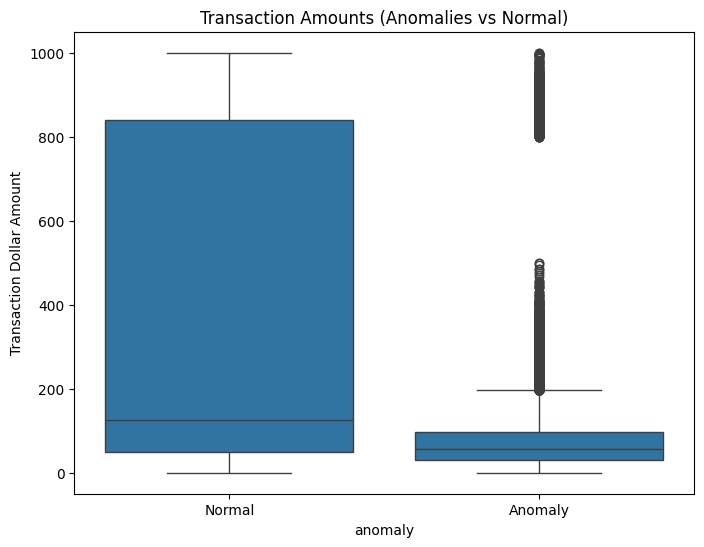

In [33]:
plt.figure(figsize=(8,6))
sns.boxplot(x='anomaly', y='transaction_dollar_amount', data=df_fraud)
plt.title('Transaction Amounts (Anomalies vs Normal)')
plt.xticks([0, 1], ['Normal', 'Anomaly'])
plt.ylabel('Transaction Dollar Amount')
plt.show()

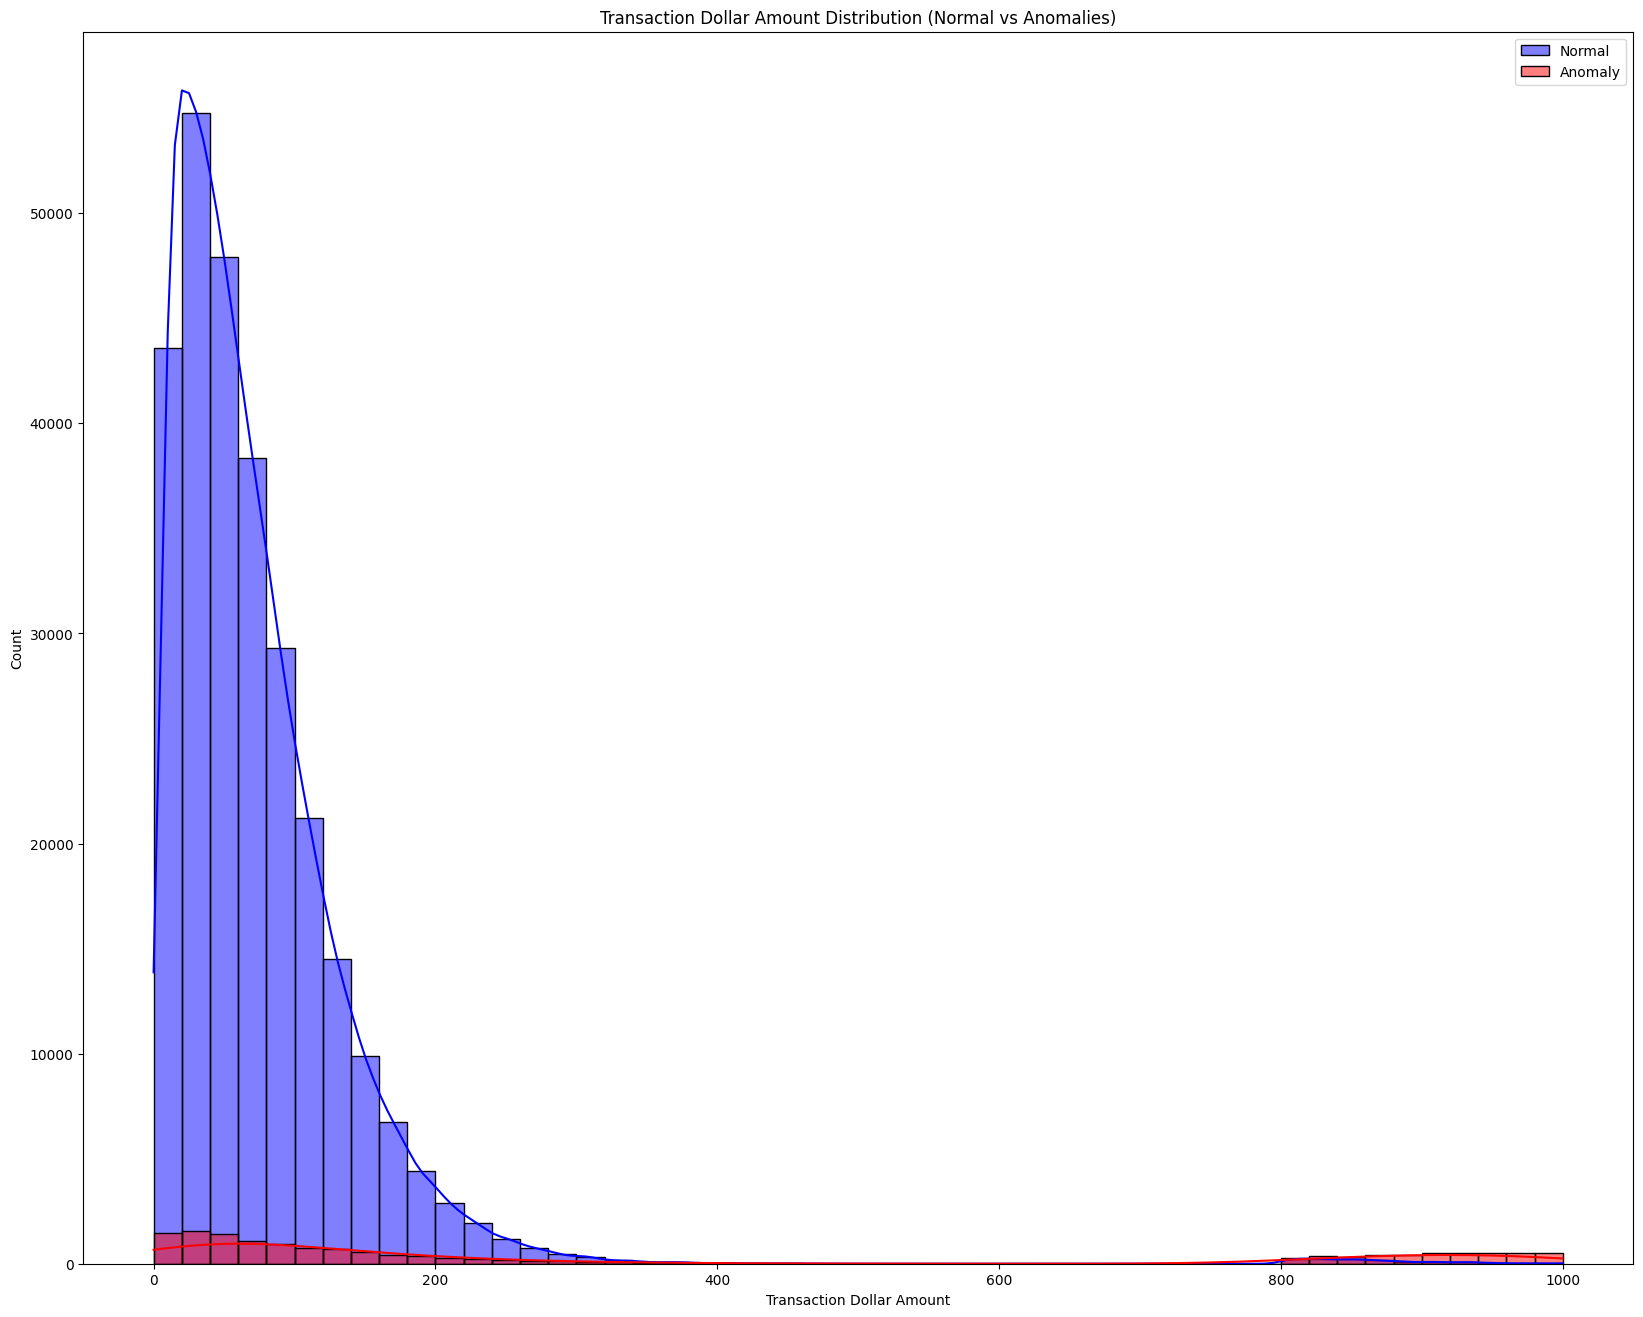

In [34]:
plt.figure(figsize=(20,16))
sns.histplot(normal['transaction_dollar_amount'], label='Normal', color='blue', kde=True, bins=50)
sns.histplot(anomalies['transaction_dollar_amount'], label='Anomaly', color='red', kde=True, bins=50)
plt.title('Transaction Dollar Amount Distribution (Normal vs Anomalies)')
plt.xlabel('Transaction Dollar Amount')
plt.legend()
plt.show()

In [35]:
df_fraud['anomaly_label'] = df_fraud['anomaly'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')

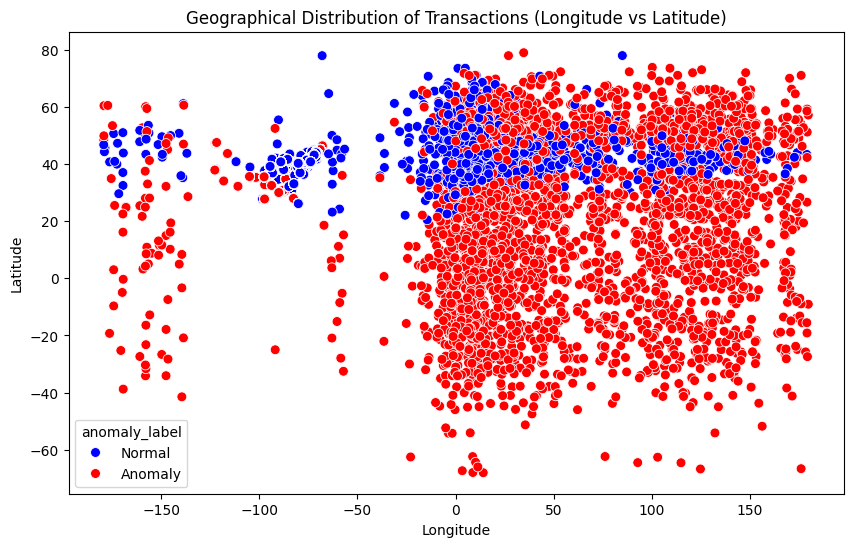

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Long', y='Lat', data=df_fraud, hue='anomaly_label', palette={'Normal': 'blue', 'Anomaly': 'red'}, s=50)
plt.title('Geographical Distribution of Transactions (Longitude vs Latitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

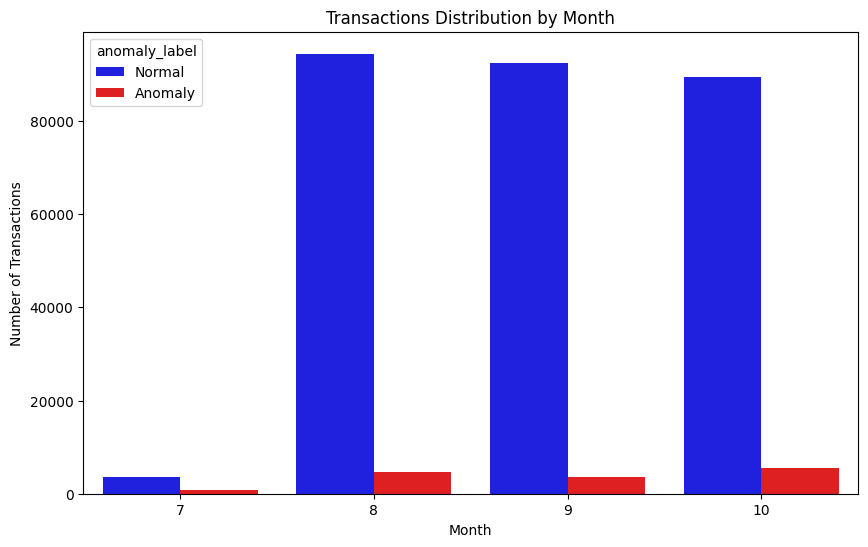

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df_fraud, hue='anomaly_label', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Transactions Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

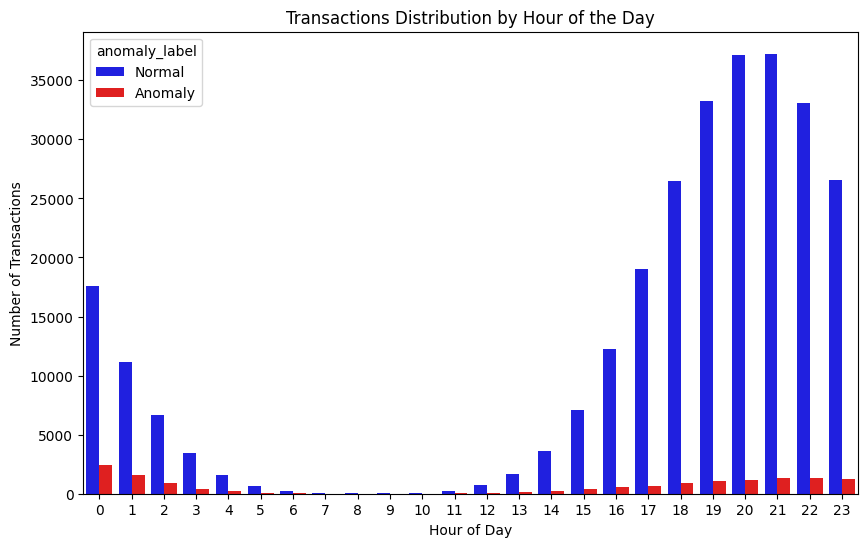

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df_fraud, hue='anomaly_label', palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Transactions Distribution by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.show()

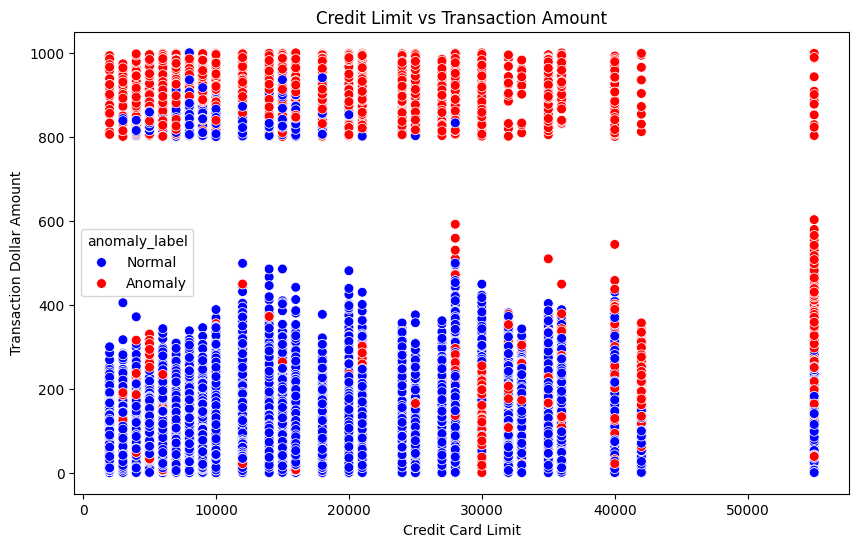

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='credit_card_limit', y='transaction_dollar_amount', hue='anomaly_label', data=df_fraud, palette={'Normal': 'blue', 'Anomaly': 'red'}, s=50)
plt.title('Credit Limit vs Transaction Amount')
plt.xlabel('Credit Card Limit')
plt.ylabel('Transaction Dollar Amount')
plt.show()

In [ ]:
df_fraud.to_csv('saved_dataset.csv')